In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

## The Law of Averages ##

Informally, the *law of averages* is the familiar statement that if you toss a coin many times you get about half heads and half tails.

The main reason for studying the law of averages is to begin to understand why large random samples are the basis for inference in data science. In this section we will take a close look at the informal statement of the law and try to make it more precise. In the process, we will confirm some intuition about probabilities and also come across a fact that may be surprising.

### The Sample Sum ###

Before we get to averages let's take a look at sums. Let $X_1, X_2, \ldots, X_n$ be i.i.d. with mean $\mu$ and SD $\sigma$, and let $S_n = X_1 + X_2 + \ldots + X_n$.

Then $E(S_n) = n\mu$, as we have known for some time. As the sample size $n$ gets larger, $E(S_n)$ also gets larger. This tells us that the distribution of $S_n$ places its mass further and further to the right as $n$ increases.

We also know that $Var(S_n) = n\sigma^2$ and hence $SD(S_n) = \sqrt{n}\sigma$. As $n$ increases, the distribution of $S_n$ is more widely dispersed around its mean.

To visualize these properties, let's take $X_1, X_2, \ldots, X_n$ to be the indicators of heads on successive tosses of a coin. 

Then $S_n$ is the number of heads in $n$ tosses and has the binomial $(n, 1/2)$ distribution with expectation $n/2$ and SD $\sqrt{n}(1/2)$.

The figure below shows the probability histograms of $S_{100}$ and $S_{400}$. You can see that the distribution of $S_{400}$ is wider and to the right of the distribution of $S_{100}$. 

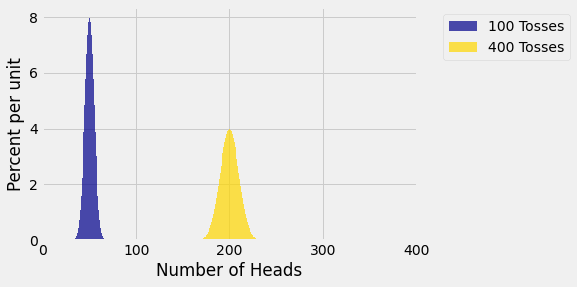

In [2]:
# NO CODE

p = 1/2
n1 = 100
n2 = 400
k1 = np.arange(n1+1)
probs1 = stats.binom.pmf(k1, n1, p)
dist1 = Table().values(k1).probabilities(probs1)
k2 = np.arange(n2+1)
probs2 = stats.binom.pmf(k2, n2, p)
dist2 = Table().values(k2).probabilities(probs2)
Plots('100 Tosses', dist1, '400 Tosses', dist2)
plt.xlabel('Number of Heads');

Because the distribution of $S_{400}$ is wider and the areas of both the histograms are 1, the histogram of $S_{400}$ is lower than that of $S_{100}$. As the sample size $n$ gets larger, the distribution of the sample sum shifts to the right and gets lower and more spread out.

This observation raises an interesting question. The histograms above indicate that the chance of 200 heads in 400 tosses is *less* than the chance of 50 heads in 100 tosses. Is that right? If so, how can it be consistent with the law of averages?

Let us try to answer these questions.

### Exactly Half Heads ###

The chance of exactly half heads is the chance of $n$ heads in $2n$ tosses, which we can calculate using the binomial formula.

$$
P(n \text{ heads in } 2n \text{ tosses } ~ = ~ 
\binom{2n}{n}\left(\frac{1}{2}\right)^n\left(\frac{1}{2}\right)^n
$$

Here is a table of some of these values.

In [3]:
def p_half_heads(m):
    """Assumes m is even and returns 
    P(m/2 heads in m tosses)"""
    return stats.binom.pmf(m/2, m, 0.5)

even = Table().with_columns('2n', np.arange(100, 1001, 50))
prob_half = even.apply(p_half_heads, 0)
even = even.with_columns('P(n heads in 2n tosses)', prob_half)
even

2n,P(n heads in 2n tosses)
100,0.0795892
150,0.0650385
200,0.0563485
250,0.0504122
300,0.0460275
350,0.0426183
400,0.0398693
450,0.0375917
500,0.0356646
550,0.0340065


The first row tells us that the chance of 50 heads in 100 tosses is about 8%. The row corresponding to 400 tosses tells us that the chance of 200 heads in 400 tosses is about 4%. Both of these chances are consistent with the peaks of the histograms of $S_{100}$ and $S_{400}$.

The entries in the chance column *decrease* as the number of tosses increases, ending at about 2.5% for the chance of 500 heads in 1000 tosses.

In [4]:
even.take(18)

2n,P(n heads in 2n tosses)
1000,0.025225


It is clear from these calculations that the chance of getting *exactly* half heads decreases as the number of tosses increases.

Indeed, it can be shown that the chance decreases to 0.

Why does this not contradict the law of averages? To understand this, look closely at the informal statment of the law: "If you toss a coin many times you get *about* half heads and half tails."

The crucial word is *about*. You expect to get *about* half heads, not *exactly* half heads.

Now let's try to understand "about" a bit better.

### The Sample Average ###

As before, let $S_n = X_1 + X_2 + \ldots + X_n$ be the sum of i.i.d random variables that have mean $\mu$ and SD $\sigma$. Now let $A_n = S_n / n$ be the sample average. 

When the $X_i$s are indicators, $A_n$ is the sample proportion of successes. 

But for the moment, we won't specialize to indicators. Instead we will develop two general facts that are consequences of the linear relation $A_n = S_n/n$.

$$
E(A_n) ~ = ~ \frac{1}{n}E(S_n) ~ = ~ \frac{1}{n} n\mu ~ = ~ \mu
$$

$$
SD(A_n) ~ = ~ \frac{1}{n}SD(S_n) ~ = ~ \frac{1}{n}\sqrt{n}\sigma ~ = ~ \frac{\sigma}{\sqrt{n}}
$$

No matter what the sample size, the distribution of the sample mean balances at the population mean. As the sample size increases, the SD of the sample mean gets smaller.

### The Square Root Law ###

As you know, the sample mean $A_n$ is an unbiased estimator of the population mean. In the language of estimation, the *accuracy* of an unbiased estimator can be measured by its SD: the smaller the SD, the more accurate the estimator.

Let's compare $SD(A_{100})$ and $SD(A_{400})$. We know that $SD(A_{400})$ is smaller, but by how much?

$$
SD(A_{400}) ~ = ~ \frac{\sigma}{\sqrt{400}} ~ = ~ \frac{\sigma}{\sqrt{4}\sqrt{100}} ~ = ~ \frac{1}{2}SD(A_{100})
$$

We say that $A_{400}$ is *twice as accurate* as $A_{100}$. The factor of $2$ comes from the relation between the square roots of the two sample sizes: $\sqrt{400} = 20$ is twice as large as $\sqrt{100} = 10$.

Accuracy doesn't come cheap. For double the accuracy, we have to multiply the sample size by a factor of $2^2 = 4$. For 5 times the accuracy, we would have to multiply the sample size by a factor of $5^2 = 25$. 

In other words, if you multiply the sample size by a factor, the accuracy only goes up by the square root of the factor. This is called the **square root law**.

### Concentration of Probabilities ###

In the figure below, $A_n$ is proportion of heads in $n$ tosses of a coin. That is, $A_n$ is the average of i.i.d. $X_1, X_2, \ldots, X_n$ where each $X_i$ is an indicator that is 1 with chance $1/2$. 

The histograms show the distribution of $A_{100}$ and $A_{400}$. Notice that both distributions balance at 0.5, and the distribution of $A_{400}$ is more concentrated around 0.5.

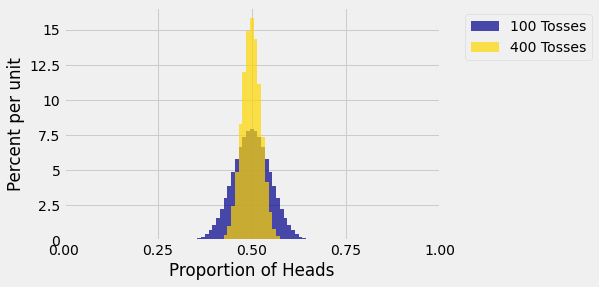

In [5]:
# NO CODE

dist_prop1 = Table().with_columns(
    'Value', dist1.column(0)/100,
    'Probability', dist1.column(1)
    )
dist_prop2 = Table().with_columns(
    'Value', dist2.column(0)/400,
    'Probability', dist2.column(1)
    )
Plots('100 Tosses', dist_prop1, '400 Tosses', dist_prop2, width=0.01)
plt.xlabel('Proportion of Heads')
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.01, 0.25));

In general, the larger the sample size $n$, the more likely it is that the sample average $A_n$ will be close to the population average $\mu$.

Formally, let $c > 0$ be any number. Then

$$
P(\mu - c < A_n < \mu + c) ~ = ~ P(\vert A_n - \mu \vert < c) ~ \to ~ 1 ~~~ \text{ as } n \to \infty
$$

No matter how small $c$ is, when the sample size is large enough the sample mean is almost certain to be in the interval $\mu \pm c$.

This result is called the **Weak Law of Large Numbers** and you can prove it using Chebyshev's inequality. We will be most interested in the special case where $A_n$ is a proportion.

### The Law of Averages ###
Let $X_1, X_2, \ldots, X_n$ be i.i.d. indicators, each equal to 1 with probability $p$. Let $A_n$ be the sample proportion of 1's, that is, let $A_n = S_n/n$ be the sample average.

The formal statement of the *law of averages* is that for each fixed $c > 0$, no matter how small,

$$
P(p - c < A_n < p + c) ~ = ~ P(\vert A_n - p \vert < c) ~ \to ~ 1 ~~~ \text{ as } n \to \infty
$$

The law of averages says that when the sample size is large, the sample proportion of 1's is hugely likely to be in a small interval around $p$. 

But the sample proportion is unlikely to be exactly equal to $p$, as we have seen in examples when $p = 0.5$.

The law of averages implies that as you keep rolling a die:

- There is greater chance that the proportion of sixes is in any fixed interval that contains $1/6$. For example, as the number of rolls gets larger there is greater chance that the proportion of sixes will be in the range 15% to 18%.
- There is less chance that the proportion of sixes is in any fixed interval that doesn't contain $1/6$. For example, as the number of rolls gets larger there is less chance that the proportion of sixes will be less than 16%.

There is nothing special about sixes in the discussion above. You could replace "six" with any other face of the die. The result is the same: in a large number of rolls, it is hugely likely that the observed proportion of times the face appears is close to $1/6$.

That is why when you repeatedly simulate rolling a die, the entire *empirical histogram* of the simulated results starts to look like the uniform distribution on 1, 2, 3, 4, 5, 6.

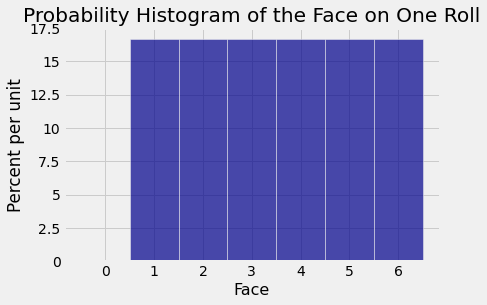

In [6]:
one_die = Table().with_columns('Face', np.arange(1, 7))
die_bins = np.arange(-0.5, 6.6, 1)
one_die.hist('Face', bins = die_bins)
plt.title('Probability Histogram of the Face on One Roll');

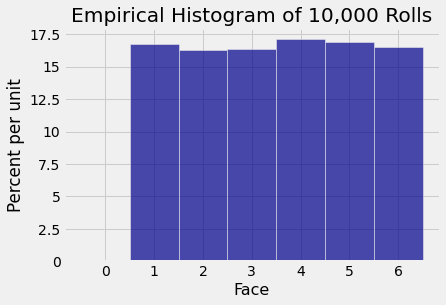

In [7]:
simulations = one_die.sample(10000)
simulations.hist('Face', bins = die_bins)
plt.title('Empirical Histogram of 10,000 Rolls');